# UNIONIZED LABOUR MARKET MODEL

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sm
import ipywidgets as widgets

# Predefine options for all plots
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-",})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload

# Import our own code
from modelproject import UnionModel
model = UnionModel()

C:\Users\peter\AppData\Local\Temp\ipykernel_23040\2081924492.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# Model description

In the following assignment, we have chosen to implement and solve the trade union model as presented in _Introducing Advanced Macroeconomics, Growth and Business Cycles_ by Sørensen and Whitta-Jacobsen (2010) focusing on the partial equilibrium on industry level.

We consider a unionized labour market with N homogeneous agents, who supply labour inelastically. The union is interested in maximizing the member's expected income which can be represented by the following optimization:
$$
\begin{aligned}
\Omega & =\max_w(w-b)L^d(w)^{\eta}, & \eta>0
\end{aligned}
$$
Where $w$ is the wage rate, $b$ is the unemployment benefit, which is exogeneous. The union need to trade-off that higher wages are good employed members but creates higher unemployment. The parameter $\eta$ affects how much the union cares about employment versus high wages for its members.

In the product market, there are $n$ heterogenous products which have the following demand:
$$
\begin{aligned}
D(P_i)=\frac{P_i}{P}^{-\sigma}\frac{Y}{n}, && \sigma>1
\end{aligned}
$$
Where $\frac{P_i}{P}=p_i$ is the relative prices of the products and $\sigma$ is the price elasticity of demand. Going forward, we will assume $Y$ and $n$ to be 1.

Firms producing the products in the economy are operating under monopolistic competition. The production function of each firm is given by:
$$
\begin{aligned}
Y_i=L_i
\end{aligned}
$$
Where $L_i$ is employment and labour is the only input in production. To begin with, we assume that the labour unions have all the market power such that the firms take wages chosen by he union as given. We will change this later when extending the model. Using the demand for products, the production function and the fact that the firms take wages as given, firm's profit function is given as:
$$
\begin{aligned}
\pi_i = p_i^{-\sigma}\frac{Y}{n}(p_i-w)
\end{aligned}
$$

**Thus the partial equilibrium on industry level is characterized by:**
1. Labour unions maximizing utility for members trading-off wages and employment
2. Firms maximize profits with respect to prices
3. Labour market clears such that: $N=U(w)+L(w)$

## Analytical solution

**The analytical solution to the model is given in the following way:** Since firms operate under monopolistic competition, and choose wages, they maximize profits with respect to the price. The price set by the firms determine the total demand for product and thereby the production and the demand for labour. Knowing the dynamics of labour demand, the union then sets wages in order to maximize the utility of it's members trading-off wages and employment. Below, we have used the sympy function in python in order to solve the model analytically. 

**Prices**

First the firms maximize profits:
$$
\begin{aligned}
\pi_i = p_i^{-\sigma}(p_i-w)
\end{aligned}
$$
with respect to prices.

In [2]:
#Defining the input symbols
p = sm.symbols('p')
w = sm.symbols('w')
sigma = sm.symbols('sigma')
L = sm.symbols('L')
b = sm.symbols('b')
eta = sm.symbols('eta')

#Writing up the profit functino
profit = p**-sigma*(p-w)

#FOC
d_profit_dp = sm.diff(profit, p)
p_max_profit = sm.solve(d_profit_dp, p)[0]

#Presenting the result
equation = sm.Eq(sm.symbols('p_i'), p_max_profit)
equation



Eq(p_i, sigma*w/(sigma - 1))

With the optimal price set as a mark-up over marginal costs, the demand for products is given and thus the demand for labour demand for products equal production.

In [3]:
#writing up the demand
Yp = p_max_profit**-sigma

#Using product funtion to isolate for labour demand
L = Yp

#Presenting the result
equation = sm.Eq(sm.symbols('L_i'), L)
equation

Eq(L_i, (sigma*w/(sigma - 1))**(-sigma))

Knowing how their wage setting impact the labour demand, the union sets the optimal wages in order to maximimze the members' expected income.

In [4]:
#Writing up the union problem
union = (w-b)*L**eta

#FOC
d_union_dp = sm.diff(union, w)
w_max_union = sm.solve(d_union_dp, w)[0]
#Presenting the result
equation = sm.Eq(sm.symbols('w_i'), w_max_union)
equation

Eq(w_i, b*eta*sigma/(eta*sigma - 1))

## Extension
In the model above, we assume that each firm is faced by one union. Thus, it seems reasonable and realistic that firms and unions should be able to negotiate wages. In order to incorporate this, we include a nash product of the following:

$$
\begin{aligned}
Nash~product = \Omega(w)^\beta*\pi(w)^{1-\beta},  &&\beta<1
\end{aligned}
$$

Where $\beta$ represent different bargaining power for unions and firms such that a higher $\beta$ will increase the bargaining power of unions. The nash product resembles a bargaining solution where, on one side of the negotiation, unions are interested in higher wages while trading off employment in order to maximize the member's expected income. Inserting the demand for labour in the union utility, their utility as a function of wages can be described by:
$$
\begin{aligned}
\Omega(w)=(w-b)*\frac{\sigma-1}{\sigma}^\sigma*w^{-\sigma}
\end{aligned}
$$
and on the other side, firms who are interested in lower wages in order to maximize profits. Profits as a function of wages can be described by:
$$
\begin{aligned}
\pi(w)=w^{1-\sigma}*\sigma^{-\sigma}*(\sigma-1)^{\sigma-1}
\end{aligned}
$$
The analytical solution to the wage is found below.

In [7]:
#Defining the input symbol
beta = sm.symbols('beta')

#Skal væk
#profit_w = p_max_profit**-sigma*(p_max_profit-w)
#Skal væk
#Nash_product = union**beta*profit_w**(1-beta)

#Writing the NA product
Nash_product = ((w-b)*((sigma-1)/sigma)**sigma*w**-sigma)**beta*(w**(1-sigma)*sigma**-sigma*(sigma-1)**(sigma-1))**(1-beta)

#FOC
d_Nash_product_dp = sm.diff(Nash_product, w)
w_max_Nash_product = sm.solve(d_Nash_product_dp, w)[0]

#Presenting the result
equation = sm.Eq(sm.symbols('w_nash'), w_max_Nash_product)
equation

Eq(w_nash, b*(beta + sigma - 1)/(sigma - 1))

## Model dynamics

Below we solve our base model where only the union has bargain power with base parameters setting $\sigma=2$, $\eta=1$, $b=0.5$. We define the model in our py-file using classes and solve the model numerically using nelder-mead.

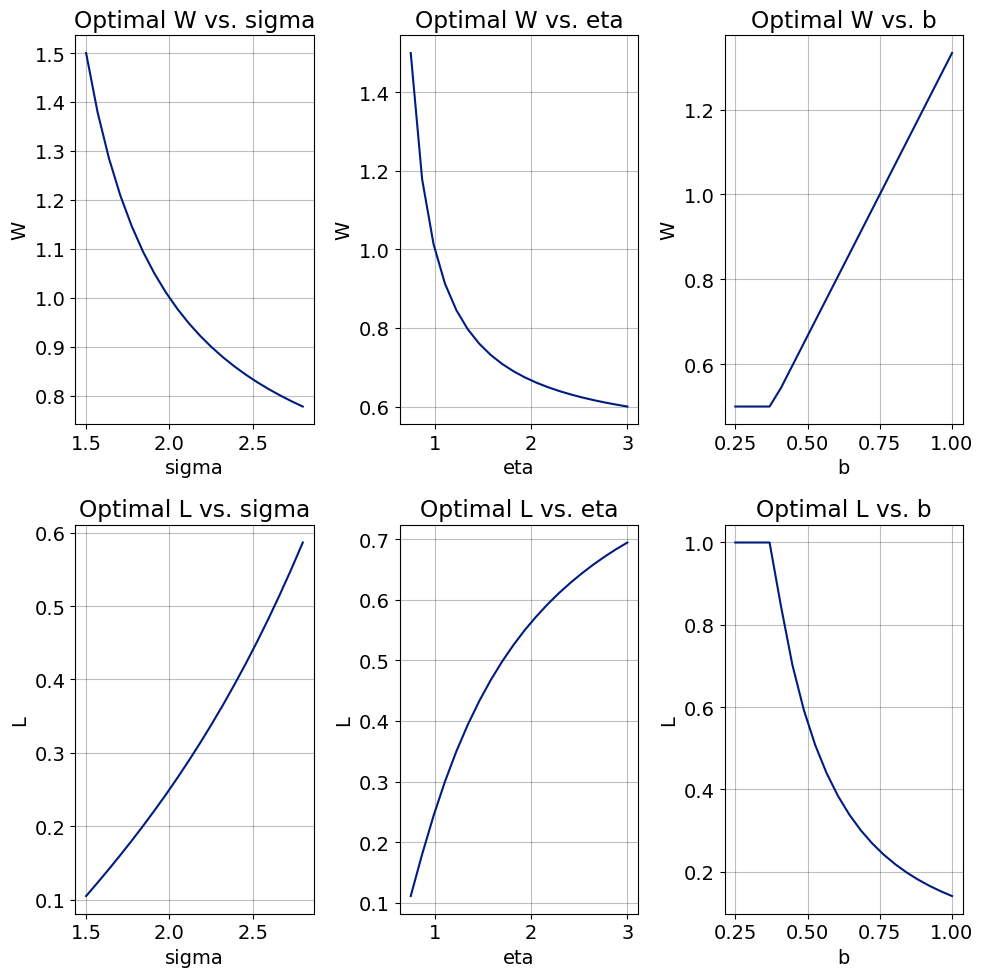

In [15]:
# Set base parameters
model.par.sigma = 2
model.par.eta = 1
model.par.b = 0.5

# Set up grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Solve model for different sigmas
list_sigmas = np.linspace(1.5, 2.8, 20)
results_df_sigma = pd.DataFrame(columns=['W', 'L', 'sigma'])
for sigma in list_sigmas:
    model.par.sigma = sigma
    opt = model.solve()
    results_df_sigma.loc[len(results_df_sigma)] = [opt.W, opt.L, sigma]
# Plot sigma vs. L
axs[1, 0].plot(results_df_sigma['sigma'], results_df_sigma['L'])
axs[1, 0].set_xlabel('sigma')
axs[1, 0].set_ylabel('L')
axs[1, 0].set_title('Optimal L vs. sigma')

# Plot sigma vs. W
axs[0, 0].plot(results_df_sigma['sigma'], results_df_sigma['W'])
axs[0, 0].set_xlabel('sigma')
axs[0, 0].set_ylabel('W')
axs[0, 0].set_title('Optimal W vs. sigma')

#Reset sigma parameter
model.par.sigma = 2

# Solve model for different etas
list_etas = np.linspace(0.75, 3, 20)
results_df_eta = pd.DataFrame(columns=['W', 'L', 'eta'])
for eta in list_etas:
    model.par.eta = eta
    opt = model.solve()
    results_df_eta.loc[len(results_df_eta)] = [opt.W, opt.L, eta]
# Plot eta vs. L
axs[1, 1].plot(results_df_eta['eta'], results_df_eta['L'])
axs[1, 1].set_xlabel('eta')
axs[1, 1].set_ylabel('L')
axs[1, 1].set_title('Optimal L vs. eta')

# Plot eta vs. W
axs[0, 1].plot(results_df_eta['eta'], results_df_eta['W'])
axs[0, 1].set_xlabel('eta')
axs[0, 1].set_ylabel('W')
axs[0, 1].set_title('Optimal W vs. eta')

#Reset eta parameter
model.par.eta = 2

# Solve model for different b
list_b = np.linspace(0.25, 1, 20)
results_df_b = pd.DataFrame(columns=['W', 'L', 'b'])
for b in list_b:
    model.par.b = b
    opt = model.solve()
    results_df_b.loc[len(results_df_b)] = [opt.W, opt.L, b]
# Plot b vs. L
axs[1, 2].plot(results_df_b['b'], results_df_b['L'])
axs[1, 2].set_xlabel('b')
axs[1, 2].set_ylabel('L')
axs[1, 2].set_title('Optimal L vs. b')

# Plot b vs. W
axs[0, 2].plot(results_df_b['b'], results_df_b['W'])
axs[0, 2].set_xlabel('b')
axs[0, 2].set_ylabel('W')
axs[0, 2].set_title('Optimal W vs. b')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Above, we show the dynamics of wages and labour with respect to parameters $\sigma$, $\eta$, and $b$.

**Changes to $\sigma$:**
Since $\sigma$ determines the price elasticity of demand, a higher $\sigma$ lowers the market power of the firms resulting in a lower mark up over their marginal costs. Unions know that the price is set as a mark up over the marginal costs, thus unions will be carefull setting high wages when demand is price sensitive since it will have a large effect on the demand for labour. In accordance with this, the top LHS figure show that wages fall when $\sigma$ increase. As a consequence of lower wage setting, the bottom LHS graph show a higher employment level for higher $\sigma$.

**Changes to $\eta$:**
A higher $\eta$ means that employment is relatively more important for the union. In line with this, the top middle graph show that a higher $\eta$ will result in lower wages as this increase employment as shown in the bottom middle graph.

**Changes to $b$:**
$b$ is the exogenous employment benefit. Higher unemployment benefit increases the income of the unemployed union members. Ceteris paribus, this means that the union should allow a higher level of unemployment. Looking at the top RHS graph it is evident that a higher $b$ leads to linearly higher wages resulting in lower demand for labour when $b$ increases as seen in the bottom RHS graph. 

# Equilibrium analysis

In the previous part, we have shown that the dynamics of our variables follow the intuition of the model. We will now turn to the equilirbium solution of the model. Again, the model is solved in the py-file together with the code for the following interactive chart.

On the graph below we show the equilibrium dynamics for changing parameters. The red dotted line will be constant throughout parameter changes as this represents the inelastic supply of labour. Starting with the base case parameters of $\sigma=2$, $\eta=1$, $b=0.5$, the green dotted line show that wages will be set to one by the unions which will interesect the demand for labour creating unemployment of 75%.

**Changes to $\sigma$:**
Lowering $\sigma$ from here increases the equilibrium wage further and lowers employment. Increasing $\sigma$ results in lower wages and higher employment until full employment is reached and wages start to increase again as unions can set higher wages without causing unemployment.

**Changes to $\eta$:**
Lowering $\eta$ increases the wage rate set by union and thus lower the employment. Opposite dynamic for increasing $\eta$.

**Changes to $b$:**
Lowering $b$ results in lower wage rate set by union, since the income as unemployed becomes lower, and thus higher employment. Opposite dynamic for increasing $b$.

## Extension
Activating the extension for base parameters and setting $b=0.5$ representing equal bargainig power between firms and unions, show that the wage set in equilibrium becomes lower and the employment becomes higher compared to the base situation where the unions have complete bargaining power. The changes to the eqilibrium from changes to the base parameters are qualatatively the same as without the extension.

**Changes to $\beta$:**
As expected, an increase in the union bargaining power represented by an increase in $\beta$ results in wages being set higher and as a consequence, higher unemployment. Increasing the bargaining power of firms, lowers the wage rate and results in lower unemployment. In the extreme where the unions have lost all their bargaining power, the monopolies maximize their profits by setting the wages the zero.

In [13]:
model.plot_interact()

#Kig lige på høj sigma og ændringer i eta. Kan man gøre således at den starter på vores baseline parametre.
#Sigma 2.8 begynder lønnen at stige

interactive(children=(FloatSlider(value=2.0, description='sigma', max=5.0, min=1.2), FloatSlider(value=1.0, de…